In [1]:
#Imports
import os
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Quick Plotting function

def plotting(x, y, z, text):
    fig = plt.figure(figsize = (13, 7))
    ax = fig.add_subplot(projection='3d') #


    surf = ax.plot_surface(x, y, z, cmap = cm.coolwarm,
    linewidth = 0, antialiased = False)

    #predict_surf = ax.plot_trisurf(x, y, zpredict, cmap = cm.coolwarm,
    #linewidth = 0, antialiased = False)
    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(text, fontsize = 15)
    plt.show()

### Generating the data that we will work with:

In [3]:
#MSE and R2
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [4]:
#Franke function:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [5]:
#Function that creates design matrix for Franke's function
def create_X(x, y, n): #design matrices for polynomials up to 10th degree
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    #print(f'Features/Length beta: {l}') #what amount should we expect?
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X

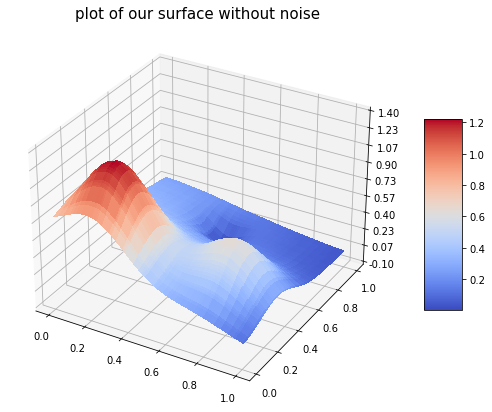

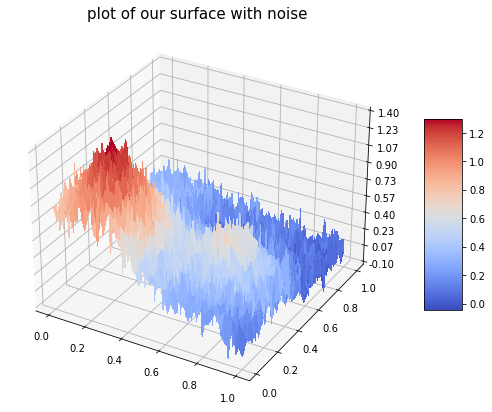

In [6]:
#Generating the datapoints:
N = 100
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))

x_, y_ = np.meshgrid(x,y)

#And for the noice:
var = 0.1 #variance of noise (?)
noise = np.random.normal(0, var, len(x_)*len(x_))
noise = noise.reshape(len(x_), len(x_))

z = FrankeFunction(x_, y_)
z_noise =  FrankeFunction(x_, y_) + noise

plotting(x_, y_, z, "plot of our surface without noise")
plotting(x_, y_, z_noise, "plot of our surface with noise")

### Simple Ridge model for degree n = 5

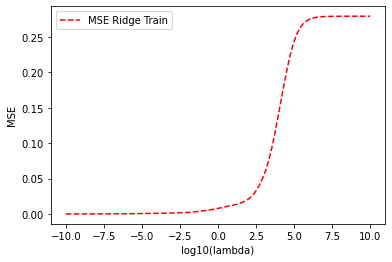

In [24]:
X = create_X(x_, y_, n = 8)

#Split this data into test and train sets:
X_train, X_test, z_train, z_test = train_test_split(X, np.ravel(z), test_size=0.2, shuffle=True)

I = np.eye(np.shape(X_train)[1],np.shape(X_train)[1]) #defining identity matrix

nlambdas = 100 #number of lambdas
MSEPredict = np.zeros(nlambdas)
lambdas = np.logspace(-10,10, nlambdas)

for i in range(nlambdas):
    RidgeBeta = np.linalg.inv(X_train.T@X_train + lambdas[i]*I) @ X_train.T @ z_train
    zpredictRidge = X_train @ RidgeBeta
    MSEPredict[i] = MSE(z_train, zpredictRidge)

#We can now visualise what is the optimal lambda value:
plt.figure()
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

We can approximetaly say that $\lambda = \log_{10}(2.3) = 0.362 $ could fit pretty well. Lets plot it and see it for our selves!

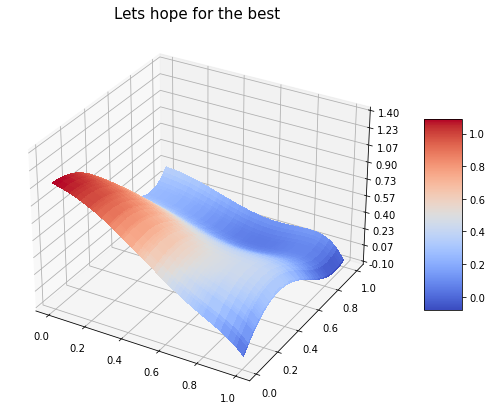

In [33]:
lambd = 0.362

RidgeBeta = np.linalg.inv(X_test.T @ X_test + lambd*I) @ X_test.T @ z_test
z_predictRidge = X @ RidgeBeta

z_full = np.concatenate([z_predictRidge, z_test]) #Combines z predicted values with the test values
z_matrix = z_predictRidge.reshape(N,N)

plotting(x_,y_, z_matrix, "Lets hope for the best")








Looks pretty darn good to me! 